In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [9]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
model = models.Sequential()

In [12]:
files = ['Consumable', 'Non-Consumable']
address = 'D:/VIT/Meat-Quality-Assessment-and-Classification/Dataset/Prawn/'

In [13]:
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

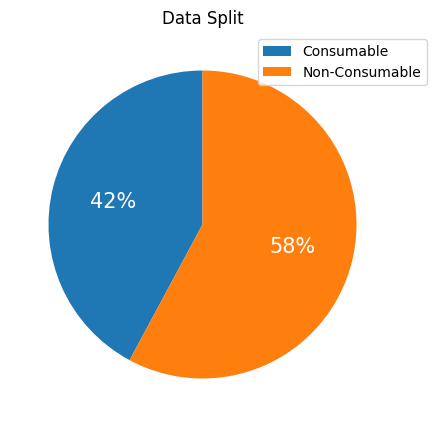

In [14]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [15]:
width = 100
height = 100

In [16]:
start = time.time()
image_data = []
image_target = []
for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 29.7866


In [17]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(121, 100, 100, 3)

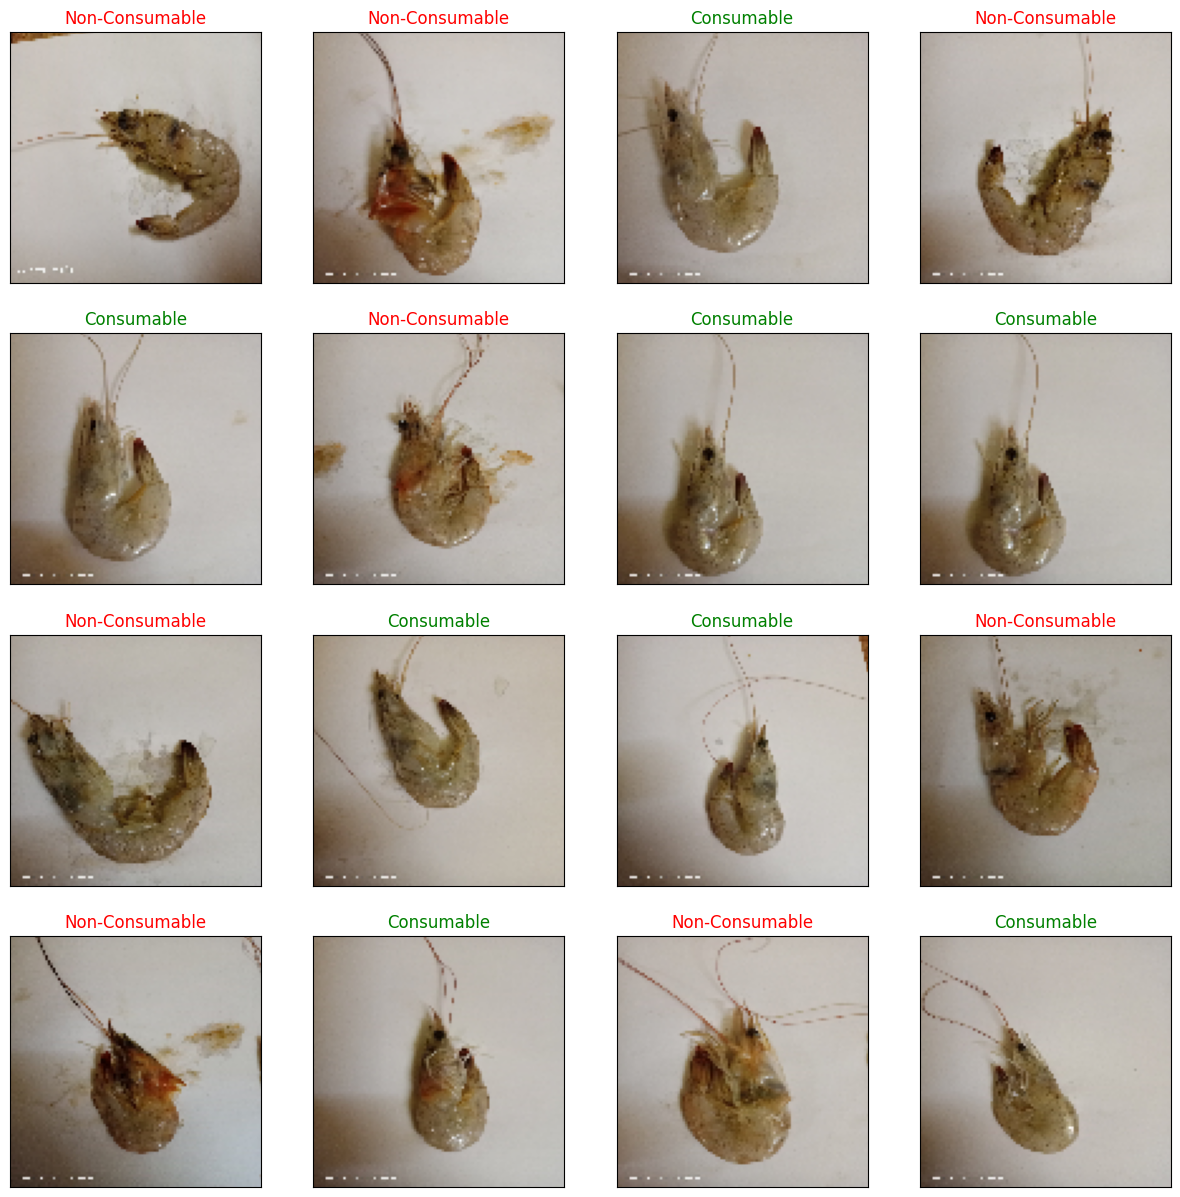

In [18]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [20]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [21]:
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

C:\Users\rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.6124 - loss: 0.8658 - val_accuracy: 0.5405 - val_loss: 0.9657
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.4840 - loss: 0.8303 - val_accuracy: 0.4595 - val_loss: 0.6940
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.3862 - loss: 0.6978 - val_accuracy: 0.5405 - val_loss: 0.6839
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6257 - loss: 0.6692 - val_accuracy: 0.5405 - val_loss: 0.6648
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5924 - loss: 0.6543 - val_accuracy: 0.7297 - val_loss: 0.6657
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.7814 - loss: 0.6439 - val_accuracy: 0.5405 - val_loss: 0.6635
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6023 - loss: 0.6161 - val_accuracy: 0.6216 - val_loss: 0.6002
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.7560 - loss: 0.5234 - val_accuracy: 0.9189 - val_loss:

2/2 - 0s - 58ms/step - accuracy: 0.8919 - loss: 0.3291


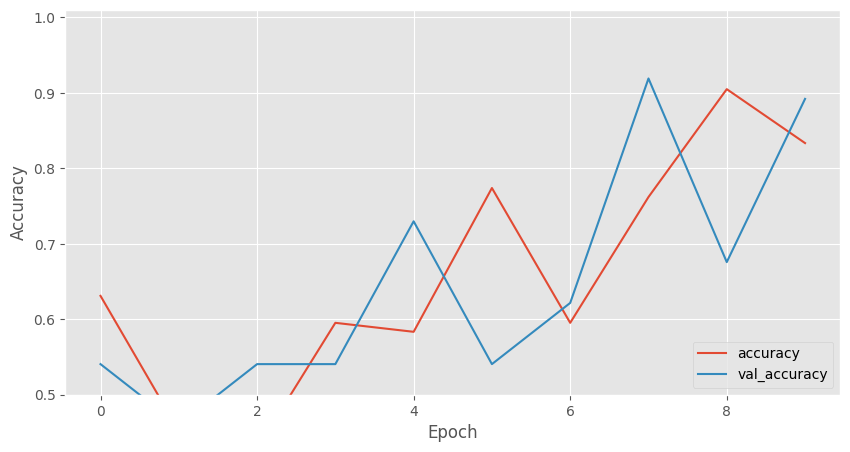

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [24]:
result=model.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8863 - loss: 0.3306


In [25]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.32907480001449585
compile_metrics : 0.8918918967247009


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


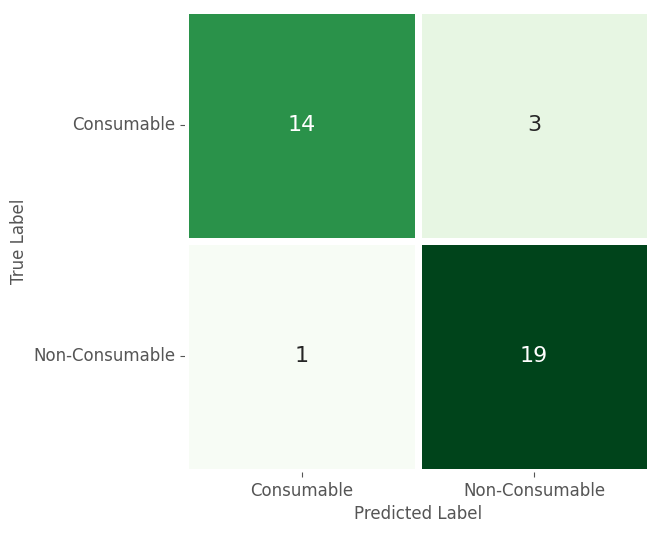

In [26]:
y_pred = model.predict(test_images)
def toClass(pred):
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
    return class_
cm = confusion_matrix(test_labels,toClass(y_pred))
df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.show()

In [28]:
model = models.Sequential()

In [30]:
files = ['Consumable', 'Non-Consumable']
address = 'D:/VIT/Meat-Quality-Assessment-and-Classification/Dataset/Prawn/'

In [31]:
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

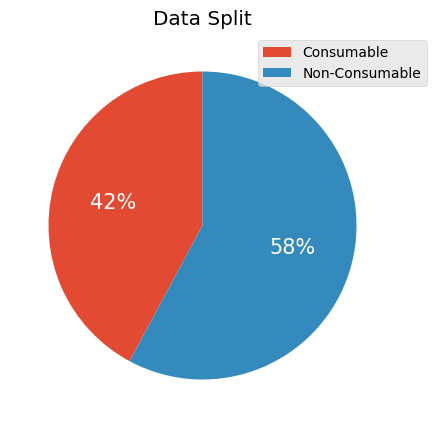

In [32]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [33]:
width = 100
height = 100

In [34]:
start = time.time()
image_data = []
image_target = []
for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 29.17336


In [35]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(121, 100, 100, 3)

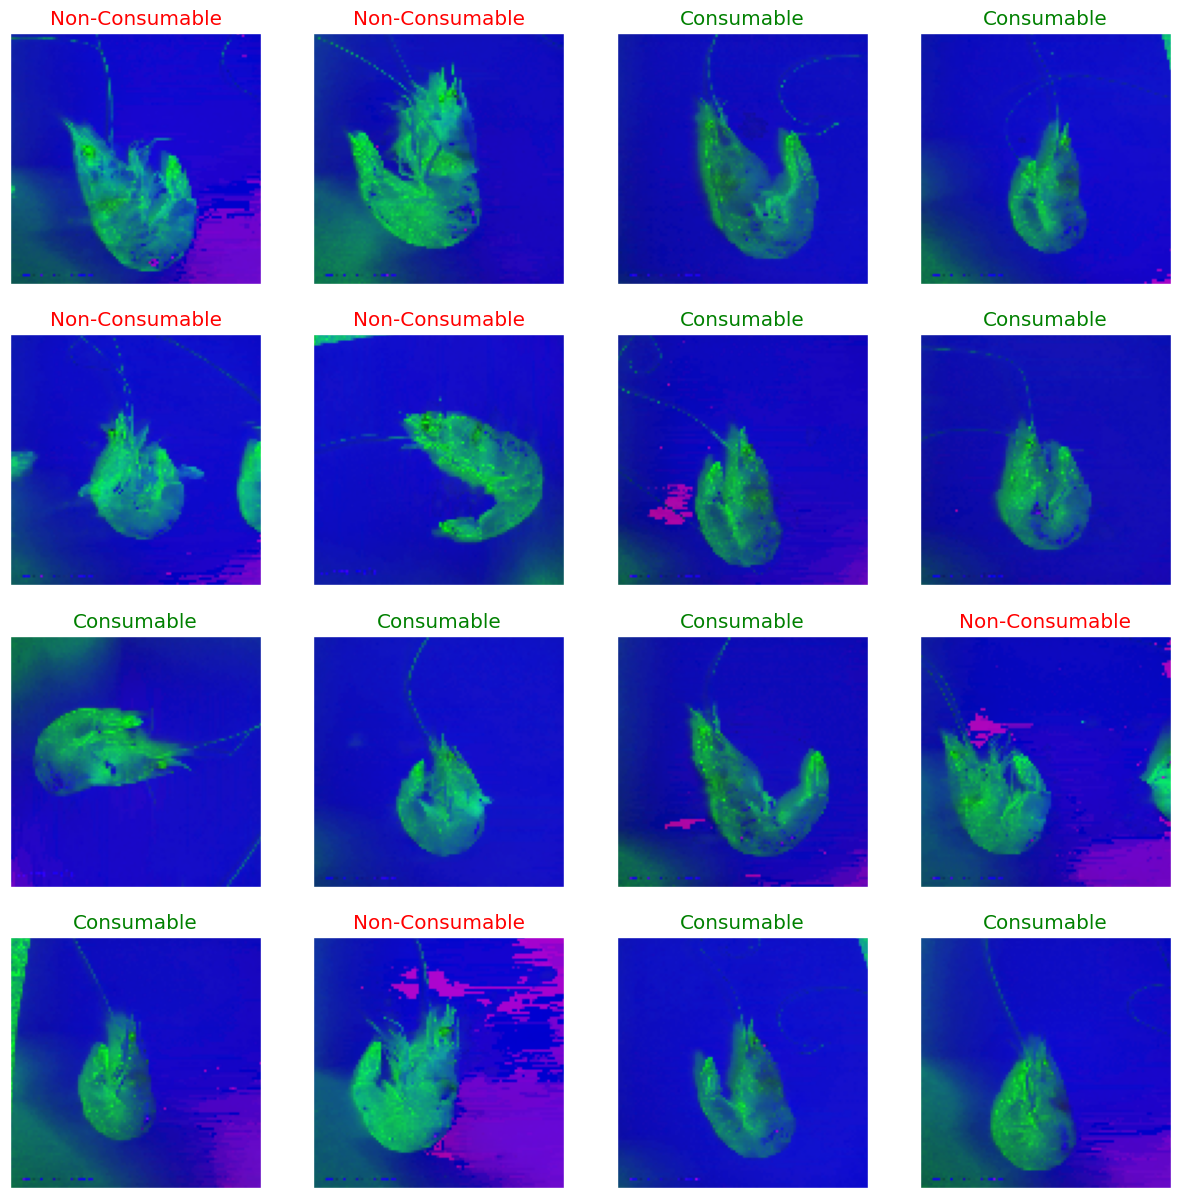

In [36]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [37]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [38]:
X = image_data / 360
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [39]:
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

C:\Users\rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.6376 - loss: 0.9038 - val_accuracy: 0.6486 - val_loss: 0.6831
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.7599 - loss: 0.6800 - val_accuracy: 0.5405 - val_loss: 0.6845
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6179 - loss: 0.6491 - val_accuracy: 0.5405 - val_loss: 0.6406
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5809 - loss: 0.6248 - val_accuracy: 0.5405 - val_loss: 0.5871
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.6179 - loss: 0.5478 - val_accuracy: 0.6757 - val_loss: 0.5331
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7563 - loss: 0.4963 - val_accuracy: 0.8108 - val_loss: 0.4921
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7814 - loss: 0.4265 - val_accuracy: 0.8108 - val_loss: 0.4725
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.9094 - loss: 0.3779 - val_accuracy: 0.7297 - val_loss:

2/2 - 0s - 48ms/step - accuracy: 0.8649 - loss: 0.4466


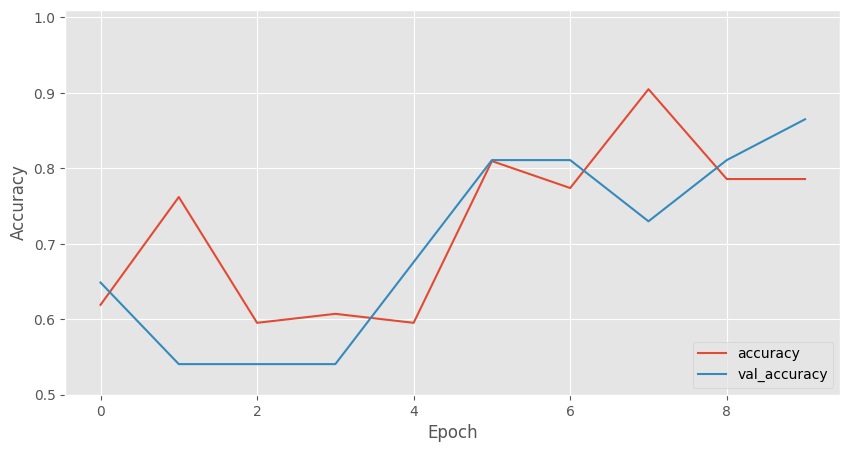

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [42]:
result=model.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8578 - loss: 0.4632


In [43]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.4466015696525574
compile_metrics : 0.8648648858070374


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


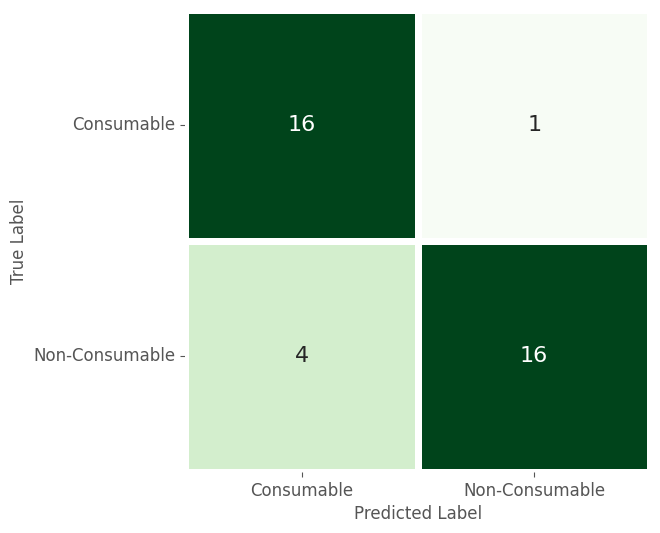

In [44]:
y_pred = model.predict(test_images)
def toClass(pred):
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
    return class_
cm = confusion_matrix(test_labels,toClass(y_pred))
df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.show()